In [17]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#Loading the description of the data
description=pd.read_csv("Data Description.csv")
description

,Data,Description
0,Model,4WD/4X4 = Four-wheel drive
1,Model,AWD = All-wheel drive
2,Model,FFV = Flexible-fuel vehicle
3,Model,SWB = Short wheelbase
4,Model,LWB = Long wheelbase
5,Model,EWB = Extended wheelbase
6,Transmission,A = automatic
7,Transmission,AM = automated manual
8,Transmission,AS = automatic with select shift
9,Transmission,AV = continuously variable


In [19]:
#Loading the data
df=pd.read_csv("CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [20]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [22]:
#Checking for null values
df.isnull().sum()/df.shape[0]

Make                                0.0
Model                               0.0
Vehicle Class                       0.0
Engine Size(L)                      0.0
Cylinders                           0.0
Transmission                        0.0
Fuel Type                           0.0
Fuel Consumption City (L/100 km)    0.0
Fuel Consumption Hwy (L/100 km)     0.0
Fuel Consumption Comb (L/100 km)    0.0
Fuel Consumption Comb (mpg)         0.0
CO2 Emissions(g/km)                 0.0
dtype: float64

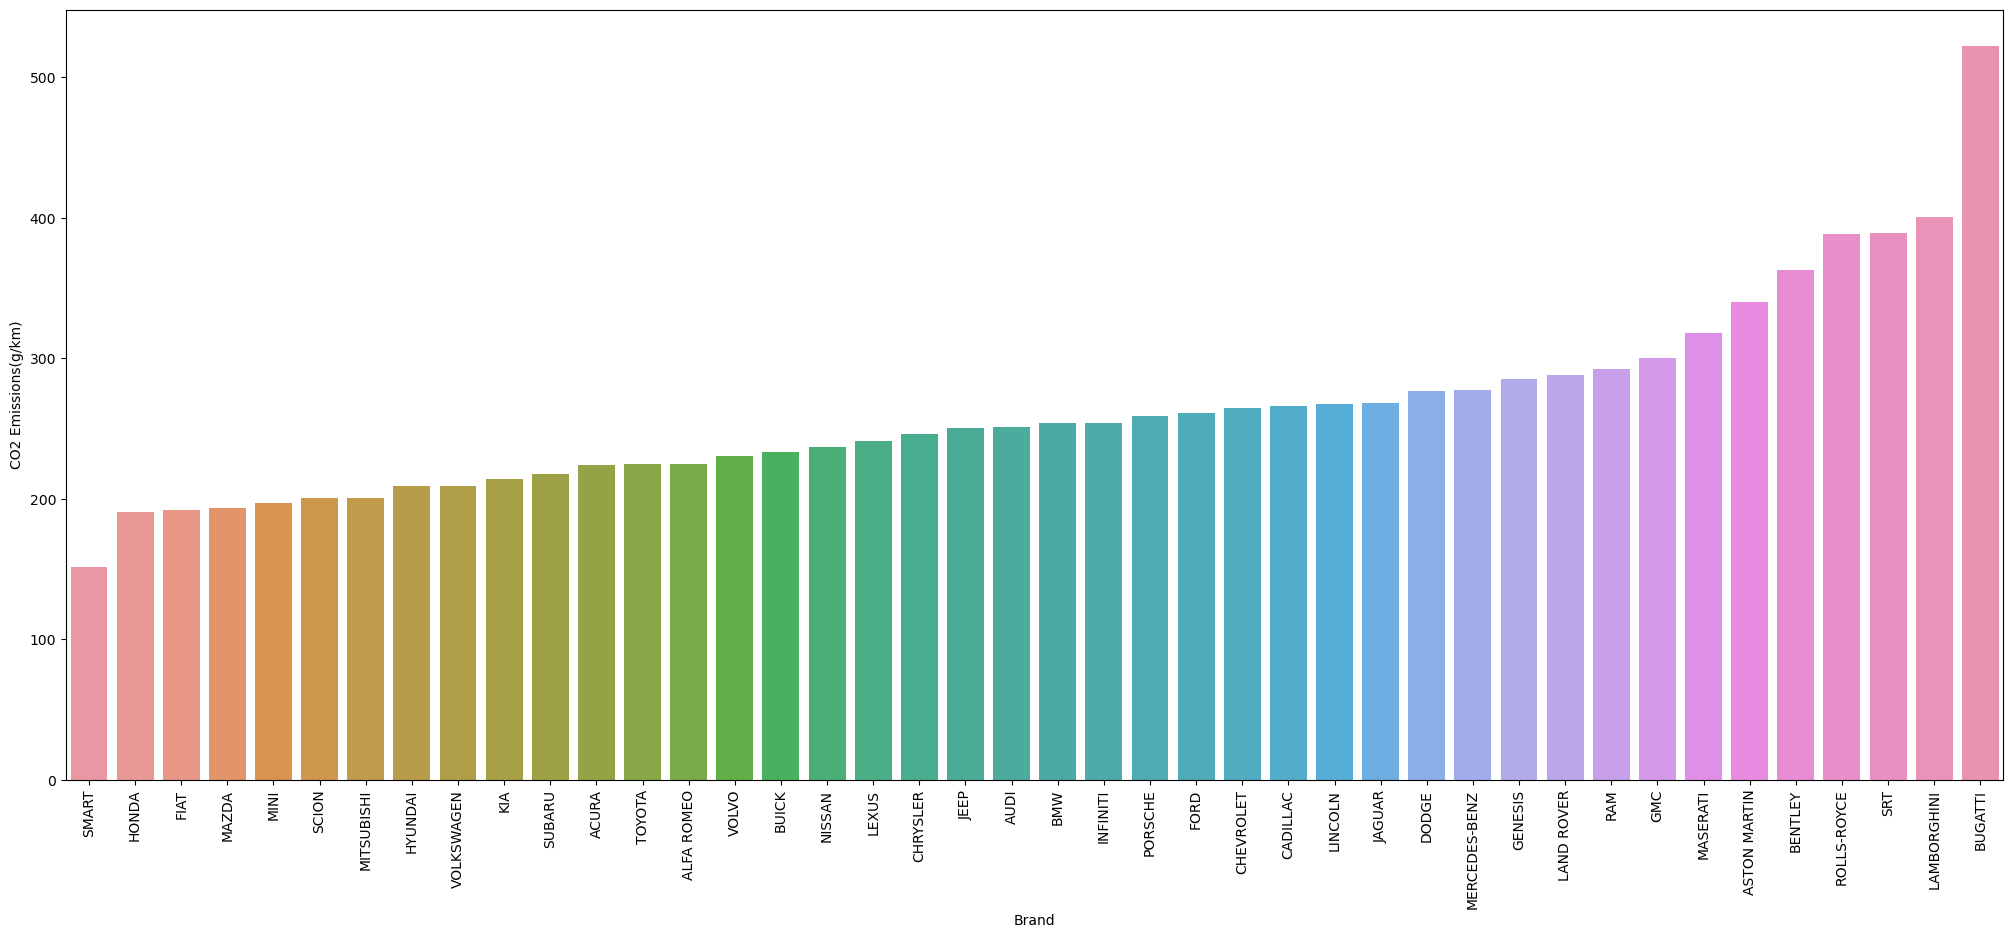

In [23]:
#Analyzing the amount of C02 emissions for Car-Brand
brand_df=pd.DataFrame(df.groupby("Make")["CO2 Emissions(g/km)"].mean().sort_values(ascending=True)).reset_index()
plt.figure(figsize=(25,10));
sns.barplot(data=brand_df,x='Make',y="CO2 Emissions(g/km)");
plt.xlabel("Brand");
plt.xticks(rotation=90);

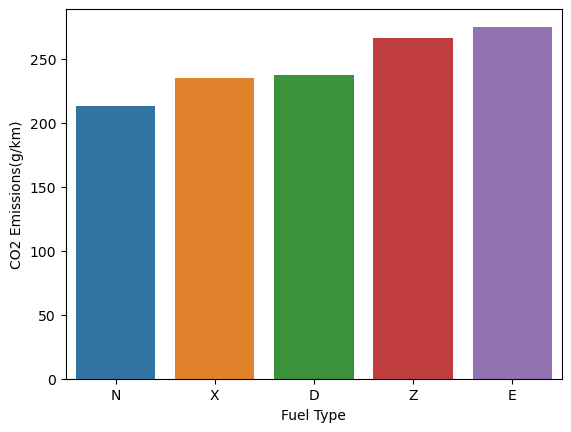

In [24]:
#Analyzing the amount of C02 emissions for Fuel-Type
fuel_df=pd.DataFrame(df.groupby("Fuel Type")["CO2 Emissions(g/km)"].mean().sort_values(ascending=True)).reset_index()
sns.barplot(data=fuel_df,x='Fuel Type',y="CO2 Emissions(g/km)");

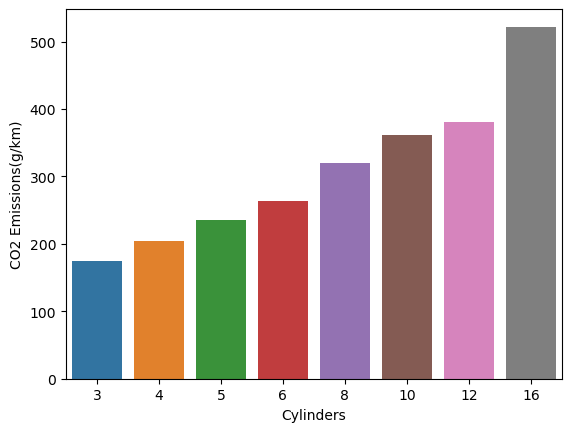

In [25]:
#Analyzing the amount of C02 emissions for Cylinders
cylinders_df=pd.DataFrame(df.groupby("Cylinders")["CO2 Emissions(g/km)"].mean().sort_values(ascending=True)).reset_index()
sns.barplot(data=cylinders_df,x='Cylinders',y="CO2 Emissions(g/km)");

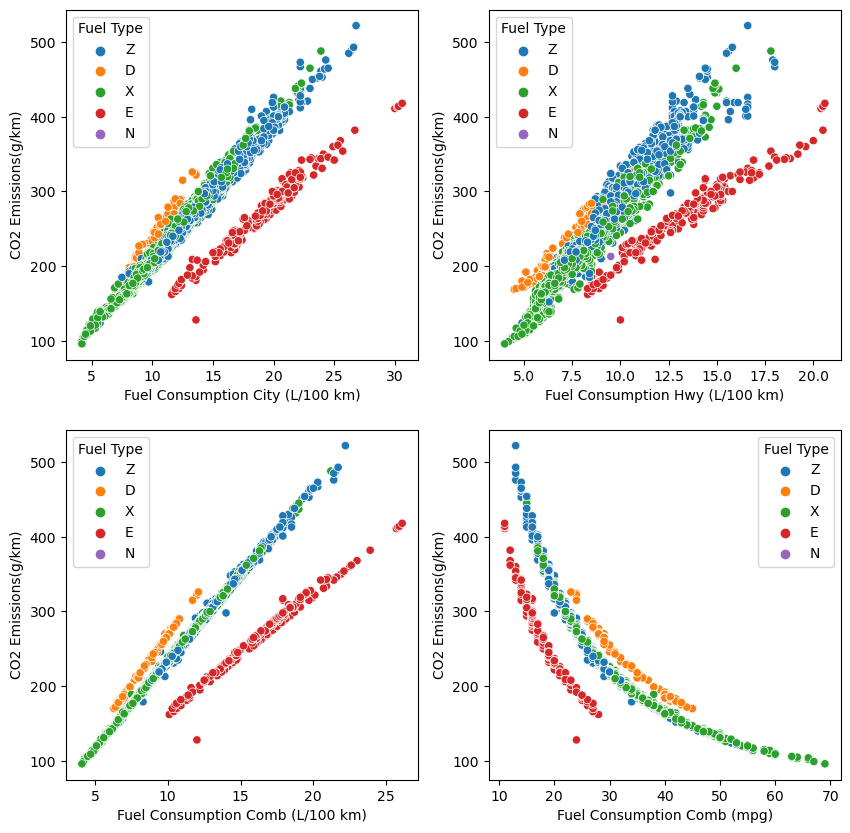

In [26]:
#Analyzing the Fuel Consumption per CO2 Emissions

%matplotlib inline
plt.subplots(figsize=(10,10))

plt.subplot(221)
sns.scatterplot(data=df,x='Fuel Consumption City (L/100 km)',y='CO2 Emissions(g/km)',hue="Fuel Type");

plt.subplot(222)
sns.scatterplot(data=df,x='Fuel Consumption Hwy (L/100 km)',y='CO2 Emissions(g/km)',hue="Fuel Type");


plt.subplot(223)
sns.scatterplot(data=df,x='Fuel Consumption Comb (L/100 km)',y='CO2 Emissions(g/km)',hue="Fuel Type");

plt.subplot(224)
sns.scatterplot(data=df,x='Fuel Consumption Comb (mpg)',y='CO2 Emissions(g/km)',hue="Fuel Type");


In [11]:
#Creating a Neural Network in order to predict the CO2 Emissions

In [27]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [28]:
#Finding the categorical features and the amount of different values the have

categorical=df.select_dtypes(include="object").columns

for line in categorical:
    print("The feature " + line + " contains" ,  str(len(df[line].unique())) ," distinct values ")

The feature Make contains 42  distinct values 
The feature Model contains 2053  distinct values 
The feature Vehicle Class contains 16  distinct values 
The feature Transmission contains 27  distinct values 
The feature Fuel Type contains 5  distinct values 


In [29]:
#Dropping the feature "Model" due to it has a huge amount of distinct values and will generate problems in the Deep Learning Model
#when we will convert it into dummies variables

df=df.drop("Model",axis=1)
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [30]:
#Converting the categorical features into dummies variables

df=pd.get_dummies(df)

In [31]:
#Defining X and y
X=df.drop(columns=["CO2 Emissions(g/km)"])
y=df[["CO2 Emissions(g/km)"]]

In [32]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [33]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()
scaler_y=StandardScaler()

scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)

y_train=pd.DataFrame(scaler_y.transform(y_train),columns=y_train.columns)


In [34]:
#Importing the libraries for the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early=EarlyStopping(monitor="val_loss", patience=5)

In [36]:
#Creating the model
model=Sequential()
model.add(Dense(256,input_dim=X.shape[1],activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="linear"))

#Compiling the model
model.compile(optimizer="adam", loss="mse")

#Fitting the model
history=model.fit(X_train,y_train,epochs=200,batch_size=32,validation_split=0.25, callbacks=[early])

Epoch 1/200
122/122 [==============================] - 3s 9ms/step - loss: 0.5778 - val_loss: 0.5383
Epoch 2/200
122/122 [==============================] - 1s 5ms/step - loss: 0.4564 - val_loss: 0.4573
Epoch 3/200
122/122 [==============================] - 1s 5ms/step - loss: 0.3870 - val_loss: 0.3965
Epoch 4/200
122/122 [==============================] - 1s 5ms/step - loss: 0.3341 - val_loss: 0.3466
Epoch 5/200
122/122 [==============================] - 1s 5ms/step - loss: 0.2902 - val_loss: 0.3059
Epoch 6/200
122/122 [==============================] - 1s 5ms/step - loss: 0.2543 - val_loss: 0.2718
Epoch 7/200
122/122 [==============================] - 1s 5ms/step - loss: 0.2253 - val_loss: 0.2430
Epoch 8/200
122/122 [==============================] - 1s 5ms/step - loss: 0.1998 - val_loss: 0.2182
Epoch 9/200
122/122 [==============================] - 1s 5ms/step - loss: 0.1775 - val_loss: 0.1994
Epoch 10/200
122/122 [==============================] - 1s 5ms/step - loss: 0.1599 - val_lo

In [37]:
#Evaluating the model

X_test_scaled=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

y_test_scaled=pd.DataFrame(scaler_y.transform(y_test),columns=y_test.columns)

model.evaluate(X_test_scaled,y_test_scaled,verbose=0)

0.012006806209683418

In [38]:
#Evaluating the neural network

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

X_test_scaled=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

y_pred=pd.DataFrame(scaler_y.inverse_transform(model.predict(X_test_scaled,verbose=0).reshape(-1,1)),columns=y_test.columns)

mae=mean_absolute_error(y_test,y_pred)

mse=mean_squared_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)

print("MAE : %f , MSE : %f , R2 : %f" % (mae,mse,r2))

MAE : 3.451974 , MSE : 41.324041 , R2 : 0.987766


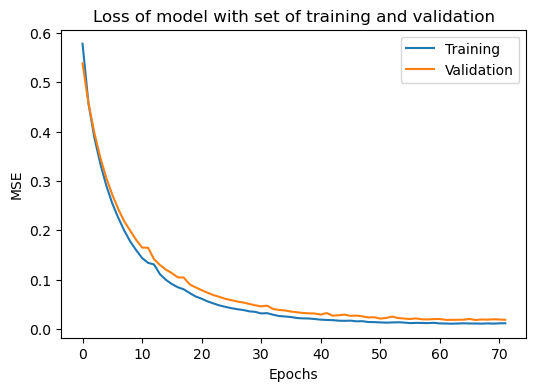

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"]);
plt.plot(history.history["val_loss"])
plt.title("Loss of model with set of training and validation")
plt.xlabel("Epochs");
plt.ylabel("MSE");
plt.legend(["Training","Validation"],loc="upper right");

In [40]:
#Proving the results

for i in range(0,20):
    print("Real = {} , Prediction = {} ".format(y_test.values[i][0] , round(y_pred.values[i][0])) )

Real = 253 , Prediction = 249 
Real = 344 , Prediction = 343 
Real = 322 , Prediction = 327 
Real = 297 , Prediction = 297 
Real = 308 , Prediction = 304 
Real = 406 , Prediction = 406 
Real = 242 , Prediction = 239 
Real = 216 , Prediction = 218 
Real = 246 , Prediction = 247 
Real = 223 , Prediction = 222 
Real = 283 , Prediction = 276 
Real = 326 , Prediction = 324 
Real = 274 , Prediction = 271 
Real = 251 , Prediction = 256 
Real = 322 , Prediction = 321 
Real = 382 , Prediction = 384 
Real = 248 , Prediction = 239 
Real = 193 , Prediction = 191 
Real = 204 , Prediction = 202 
Real = 211 , Prediction = 210 
